## 네이버 연관 검색어 수집
- 정적페이지 : html(str) : BeautifulSoup : bs_obj.select(css-selecter) : text 

In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [9]:
# 1. 웹서비스 분석 : URL
keyword  = "삼성전자"
url = f"https://search.naver.com/search.naver?query={keyword}"
print(url)

https://search.naver.com/search.naver?query=삼성전자


In [6]:
# 2. request(url) > response(data) : data(html)
# html문자열은 한페이지 모두

In [12]:
response = requests.get(url)
response

<Response [200]>

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="삼성전자 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'삼성전자\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'삼성전자\'의 네이버 통합검색 결과입니다."> <title>삼성전자 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220217.css"> <link rel="stylesheet" type="text/css" 
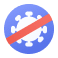
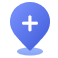
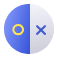
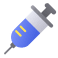
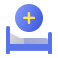

In [13]:
response.text

In [7]:
# 3. data(html) > bs_obj.select(css-selecter) > text

In [21]:
dom = BeautifulSoup(response.text,"html.parser")

In [15]:
type(dom)

bs4.BeautifulSoup

In [16]:
dir(dom)

['ASCII_SPACES',
 'DEFAULT_BUILDER_FEATURES',
 'NO_PARSER_SPECIFIED_WARNING',
 'ROOT_TAG_NAME',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_check_markup_is_url',
 '_decode_markup',
 '_feed',
 '_find_all',
 '_find_one',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_linkage_fixer',
 '_most_recent_element',
 '_namespaces',
 '_popToTag',
 '_should_pretty_print',
 'append',
 'attrs',
 'builder',
 'can_be_empty_element',
 'cdata_list_attributes',
 'childGenerator'

In [17]:
# select() : 여러개의 엘리먼트 선택 : list : [Tag, Tag, Tag, ...]
# select_one() : 하나의 엘리먼트 선택 : Tag

In [19]:
# li 엘리먼트 10개 선택 id = #      class = .

In [26]:
elements = dom.select(".lst_related_srch > li")
len(elements), type(elements[0])

(10, bs4.element.Tag)

In [30]:
element=elements[0]
keyword=element.select_one(".tit").text
keyword

'삼성전자 주가'

In [ ]:
# 반복문으로 각각의 엘리먼트에서 text 추철

In [33]:
keywords = [element.select_one(".tit").text for element in elements]
keywords

['삼성전자 주가',
 '삼성전자 배당금',
 '삼성전자 주식',
 '삼성전자 특별보너스',
 '삼성전자 배당금 지급일',
 '오늘 삼성전자 주가',
 '삼성전자 성과급',
 '삼성 전자레인지',
 '삼성전자 채용',
 '삼성전자 보너스']

In [41]:
def relational_keyword(keyword) :
    url = f"https://search.naver.com/search.naver?query={keyword}"
    response = requests.get(url)
    dom = BeautifulSoup(response.text,"html.parser")
    elements = dom.select(".lst_related_srch > li")
    return [element.select_one(".tit").text for element in elements]

relational_keyword('전쟁')

['러시아 우크라이나 전쟁',
 '우크라이나 전쟁',
 '러시아 전쟁',
 '우크라이나 러시아 전쟁',
 '미국 전쟁',
 '유럽 전쟁',
 '최근 전쟁',
 '세계전쟁',
 '전쟁위기',
 '미국 러시아 전쟁']